In [235]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [354]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [355]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,True,0.0,...,-122.257,1340,5650,65,65,False,12.251612,8.232375,0.880597,1.000000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,-122.319,1690,7639,69,29,True,12.613856,30.859494,1.520710,0.948030
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,-122.233,2720,8062,87,87,False,16.333282,33.112379,0.283088,1.240387
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,-122.393,1360,5000,55,55,True,10.617501,10.988905,1.441176,1.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,-122.045,1800,7503,33,33,False,21.759524,27.230991,0.933333,1.076903


In [356]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_city',
       'distance_from_airport', 'sqft_living_comparison',
       'sqft_lot_comparison'],
      dtype='object')

In [357]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

In [358]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport']

In [359]:
totransform = ['bathrooms','bedrooms','distance_from_city','sqft_lot']

In [360]:
nottransform = ['Age_of_House','distance_from_airport','Years_last_renovation']

In [361]:
def remove_outliers(df, col, threshold = 4):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

numericals

all_indices = []
for col in numericals:
    indices = remove_outliers(df, col, threshold = 4)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [362]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,False,0.0,...,-122.331,1330,4700,73,73,True,8.871826,27.231767,1.218045,1.276596


In [363]:
df.drop(index=all_indices,inplace = True)

In [364]:
data_log = pd.DataFrame([])

for name in totransform:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log
0,-1.727276,-0.267365,-0.325988,-0.356548
1,0.375566,-0.267365,-0.281628,-0.041963
2,-1.727276,-1.717368,0.111767,0.366964
3,1.121561,0.761429,-0.543921,-0.511428
4,0.070140,-0.267365,0.548454,0.096794
...,...,...,...,...
21592,0.648778,-0.267365,-0.608484,-2.394990
21593,0.648778,0.761429,-0.490106,-0.320505
21594,-2.473272,-1.717368,-2.416336,-2.170683
21595,0.648778,-0.267365,0.534622,-1.447904


In [365]:
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
water_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
base_dummies = pd.get_dummies(df['basement'], prefix='base', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [366]:
dfnew  = pd.concat([data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies,water_dummies,base_dummies,zipcode_dummies],axis = 1)

In [367]:
datanottransform = df[nottransform].apply(normalize)

In [368]:
dfnew = pd.concat([dfnew,datanottransform],axis = 1)

In [369]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.535396,-1.389968,0.608127
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.671615,0.993080,-0.634569
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.284598,1.230350,1.367553
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.194850,-1.099655,0.262934
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.554351,0.610933,-0.496491


In [370]:
dfnew['price'] = df.price

In [371]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation,price
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,1,0,0,0,0.535396,-1.389968,0.608127,221900.0
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0.671615,0.993080,-0.634569,538000.0
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,1.284598,1.230350,1.367553,180000.0
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0.194850,-1.099655,0.262934,604000.0
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.554351,0.610933,-0.496491,510000.0


In [375]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [376]:
X = dfnew.drop(['price'],axis = 1)
y = dfnew['price']

In [377]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              4772.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:25:24   Log-Likelihood:                     -2.7416e+05
No. Observations:               20909   AIC:                                  5.485e+05
Df Residuals:                   20809   BIC:                                  5.493e+05
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log           3.674e+04   1425.226     25.778      0.000    3.39e+04    3.95e+04
bedrooms_log             1.86e+04   1063.423     17.494      0.000    1.65e+04    2.07e+04
distance_from_city_log -7.106e+04   4711.766    -15.081      0.000   -8.03e+04   -6.18e+04
sqft_lot_log            4.295e+04   1265.564     33.938      0.000    4.05e+04    4.54e+04
floor_1.5               2.599e+04   3370.366      7.712      0.000    1.94e+04    3.26e+04
floor_2.0               3.442e+04   2751.825     12.509      0.000     2.9e+04    3.98e+04
floor_2.5               7.291e+04   1.08e+04      6.748      0.000    5.17e+04    9.41e+04
floor_3.0                -1.6e+04   6439.128     -2.485      0.013   -2.86e+04   -3382.792
floor_3.5              -6.301e+04   4.93e+04     -1.277      0.202    -1.6e+05    3.37e+04
view_1.0                9.515e+04   7010.122     13.573      0.000    8.14e+04    1.09e+05
view_2.0                8.837e+04   4300.657     20.547      0.000    7.99e+04    9.68e+04
view_3.0                1.738e+05   6017.802     28.873      0.000    1.62e+05    1.86e+05
view_4.0                3.917e+05   8074.152     48.511      0.000    3.76e+05    4.08e+05
cond_2                  6.944e+04   2.44e+04      2.847      0.004    2.16e+04    1.17e+05
cond_3                  1.049e+05   2.26e+04      4.640      0.000    6.06e+04    1.49e+05
cond_4                  1.228e+05   2.26e+04      5.429      0.000    7.84e+04    1.67e+05
cond_5                  1.675e+05   2.27e+04      7.365      0.000    1.23e+05    2.12e+05
grade_4                 1.822e+05   3.33e+04      5.468      0.000    1.17e+05    2.47e+05
grade_5                 1.463e+05   2.49e+04      5.866      0.000    9.74e+04    1.95e+05
grade_6                  1.54e+05   2.45e+04      6.290      0.000    1.06e+05    2.02e+05
grade_7                 1.797e+05   2.44e+04      7.372      0.000    1.32e+05    2.27e+05
grade_8                 2.486e+05   2.45e+04     10.166      0.000    2.01e+05    2.97e+05
grade_9                 3.924e+05   2.46e+04     15.936      0.000    3.44e+05    4.41e+05
grade_10                5.431e+05   2.49e+04     21.801      0.000    4.94e+05    5.92e+05
grade_11                 7.18e+05   2.57e+04     27.900      0.000    6.68e+05    7.68e+05
grade_12                9.718e+05   3.27e+04     29.724      0.000    9.08e+05    1.04e+06
water_True              1.065e+04   2622.256      4.061      0.000    5508.324    1.58e+04
base_True               1.236e+04   2131.254      5.798      0.000    8178.772    1.65e+04
zip_98002               2.909e+04   1.07e+04      2.716      0.007    8098.478    5.01e+04
zip_98003               -255.0624   9609.832     -0.027      0.979   -1.

In [378]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

100 83
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'sqft_lot_log', 'floor_1.5']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,3.674e+04,1425.226,25.778,0.0,3.39e+04,3.95e+04
bedrooms_log,1.86e+04,1063.423,17.494,0.0,1.65e+04,2.07e+04
distance_from_city_log,-7.106e+04,4711.766,-15.081,0.0,-8.03e+04,-6.18e+04
sqft_lot_log,4.295e+04,1265.564,33.938,0.0,4.05e+04,4.54e+04
floor_1.5,2.599e+04,3370.366,7.712,0.0,1.94e+04,3.26e+04


In [379]:
X = dfnew[x_cols]
y= dfnew['price']

In [380]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              5743.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:25:27   Log-Likelihood:                     -2.7418e+05
No. Observations:               20909   AIC:                                  5.485e+05
Df Residuals:                   20826   BIC:                                  5.492e+05
Df Model:                          83                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log            3.68e+04   1423.131     25.858      0.000     3.4e+04    3.96e+04
bedrooms_log            1.852e+04   1060.227     17.466      0.000    1.64e+04    2.06e+04
distance_from_city_log -6.813e+04   2489.112    -27.370      0.000    -7.3e+04   -6.32e+04
sqft_lot_log            4.346e+04   1247.498     34.838      0.000     4.1e+04    4.59e+04
floor_1.5               2.597e+04   3364.536      7.718      0.000    1.94e+04    3.26e+04
floor_2.0               3.492e+04   2740.076     12.744      0.000    2.95e+04    4.03e+04
floor_2.5               7.361e+04   1.08e+04      6.815      0.000    5.24e+04    9.48e+04
floor_3.0              -1.536e+04   6421.653     -2.391      0.017   -2.79e+04   -2770.296
view_1.0                9.521e+04   6994.367     13.613      0.000    8.15e+04    1.09e+05
view_2.0                8.834e+04   4292.298     20.581      0.000    7.99e+04    9.68e+04
view_3.0                1.742e+05   5987.904     29.084      0.000    1.62e+05    1.86e+05
view_4.0                3.926e+05   8035.443     48.854      0.000    3.77e+05    4.08e+05
cond_2                  6.885e+04   2.44e+04      2.825      0.005    2.11e+04    1.17e+05
cond_3                  1.032e+05   2.26e+04      4.570      0.000    5.89e+04    1.47e+05
cond_4                  1.211e+05   2.26e+04      5.363      0.000    7.68e+04    1.65e+05
cond_5                  1.664e+05   2.27e+04      7.327      0.000    1.22e+05    2.11e+05
grade_4                 1.753e+05    3.2e+04      5.473      0.000    1.13e+05    2.38e+05
grade_5                 1.411e+05   2.33e+04      6.052      0.000    9.54e+04    1.87e+05
grade_6                 1.485e+05   2.28e+04      6.521      0.000    1.04e+05    1.93e+05
grade_7                  1.74e+05   2.27e+04      7.665      0.000     1.3e+05    2.19e+05
grade_8                 2.427e+05   2.28e+04     10.653      0.000    1.98e+05    2.87e+05
grade_9                 3.862e+05    2.3e+04     16.828      0.000    3.41e+05    4.31e+05
grade_10                5.366e+05   2.32e+04     23.092      0.000    4.91e+05    5.82e+05
grade_11                7.113e+05   2.41e+04     29.468      0.000    6.64e+05    7.59e+05
grade_12                9.646e+05   3.14e+04     30.679      0.000    9.03e+05    1.03e+06
water_True              1.066e+04   2621.370      4.067      0.000    5523.235    1.58e+04
base_True               1.187e+04   2125.021      5.586      0.000    7704.470     1.6e+04
zip_98002               3.179e+04   8895.189      3.574      0.000    1.44e+04    4.92e+04
zip_98004               5.991e+05   8231.210     72.782      0.000    5.83e+05    6.15e+05
zip_98005               2.488e+05   9974.684     24.938      0.000    2.

In [381]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

83 83
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'sqft_lot_log', 'floor_1.5']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,3.68e+04,1423.131,25.858,0.0,3.4e+04,3.96e+04
bedrooms_log,1.852e+04,1060.227,17.466,0.0,1.64e+04,2.06e+04
distance_from_city_log,-6.813e+04,2489.112,-27.370,0.0,-7.3e+04,-6.32e+04
sqft_lot_log,4.346e+04,1247.498,34.838,0.0,4.1e+04,4.59e+04
floor_1.5,2.597e+04,3364.536,7.718,0.0,1.94e+04,3.26e+04


In [382]:
X = dfnew[x_cols]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              5743.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:25:29   Log-Likelihood:                     -2.7418e+05
No. Observations:               20909   AIC:                                  5.485e+05
Df Residuals:                   20826   BIC:                                  5.492e+05
Df Model:                          83                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log            3.68e+04   1423.131     25.858      0.000     3.4e+04    3.96e+04
bedrooms_log            1.852e+04   1060.227     17.466      0.000    1.64e+04    2.06e+04
distance_from_city_log -6.813e+04   2489.112    -27.370      0.000    -7.3e+04   -6.32e+04
sqft_lot_log            4.346e+04   1247.498     34.838      0.000     4.1e+04    4.59e+04
floor_1.5               2.597e+04   3364.536      7.718      0.000    1.94e+04    3.26e+04
floor_2.0               3.492e+04   2740.076     12.744      0.000    2.95e+04    4.03e+04
floor_2.5               7.361e+04   1.08e+04      6.815      0.000    5.24e+04    9.48e+04
floor_3.0              -1.536e+04   6421.653     -2.391      0.017   -2.79e+04   -2770.296
view_1.0                9.521e+04   6994.367     13.613      0.000    8.15e+04    1.09e+05
view_2.0                8.834e+04   4292.298     20.581      0.000    7.99e+04    9.68e+04
view_3.0                1.742e+05   5987.904     29.084      0.000    1.62e+05    1.86e+05
view_4.0                3.926e+05   8035.443     48.854      0.000    3.77e+05    4.08e+05
cond_2                  6.885e+04   2.44e+04      2.825      0.005    2.11e+04    1.17e+05
cond_3                  1.032e+05   2.26e+04      4.570      0.000    5.89e+04    1.47e+05
cond_4                  1.211e+05   2.26e+04      5.363      0.000    7.68e+04    1.65e+05
cond_5                  1.664e+05   2.27e+04      7.327      0.000    1.22e+05    2.11e+05
grade_4                 1.753e+05    3.2e+04      5.473      0.000    1.13e+05    2.38e+05
grade_5                 1.411e+05   2.33e+04      6.052      0.000    9.54e+04    1.87e+05
grade_6                 1.485e+05   2.28e+04      6.521      0.000    1.04e+05    1.93e+05
grade_7                  1.74e+05   2.27e+04      7.665      0.000     1.3e+05    2.19e+05
grade_8                 2.427e+05   2.28e+04     10.653      0.000    1.98e+05    2.87e+05
grade_9                 3.862e+05    2.3e+04     16.828      0.000    3.41e+05    4.31e+05
grade_10                5.366e+05   2.32e+04     23.092      0.000    4.91e+05    5.82e+05
grade_11                7.113e+05   2.41e+04     29.468      0.000    6.64e+05    7.59e+05
grade_12                9.646e+05   3.14e+04     30.679      0.000    9.03e+05    1.03e+06
water_True              1.066e+04   2621.370      4.067      0.000    5523.235    1.58e+04
base_True               1.187e+04   2125.021      5.586      0.000    7704.470     1.6e+04
zip_98002               3.179e+04   8895.189      3.574      0.000    1.44e+04    4.92e+04
zip_98004               5.991e+05   8231.210     72.782      0.000    5.83e+05    6.15e+05
zip_98005               2.488e+05   9974.684     24.938      0.000    2.

In [383]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = dfnew[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bathrooms_log', 2.9354771941086777),
 ('bedrooms_log', 1.6292452082702746),
 ('distance_from_city_log', 8.980023480640218),
 ('sqft_lot_log', 2.2556324736420956),
 ('floor_1.5', 1.4431399914936636),
 ('floor_2.0', 4.0857442545580955),
 ('floor_2.5', 1.083731474682018),
 ('floor_3.0', 1.7266602274459797),
 ('view_1.0', 1.054710876886922),
 ('view_2.0', 1.1277601153966845),
 ('view_3.0', 1.0936506358815494),
 ('view_4.0', 1.0876826990733652),
 ('cond_2', 6.548203311869944),
 ('cond_3', 478.4849420389416),
 ('cond_4', 195.30250428645454),
 ('cond_5', 58.91758791964436),
 ('grade_4', 1.9203915622158563),
 ('grade_5', 8.66558691184753),
 ('grade_6', 72.10822266624625),
 ('grade_7', 316.1977529248401),
 ('grade_8', 214.90425932919973),
 ('grade_9', 91.62812784562553),
 ('grade_10', 37.87816537944353),
 ('grade_11', 10.984529449918835),
 ('grade_12', 2.1929601465668918),
 ('water_True', 1.1489738917317995),
 ('base_True', 2.5074665329589476),
 ('zip_98002', 1.0860548510778467),
 ('zip_9800

In [339]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

80 70


In [191]:
X = dfnew[x_cols]

In [192]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              3897.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:05:20   Log-Likelihood:                     -2.9113e+05
No. Observations:               20754   AIC:                                  5.823e+05
Df Residuals:                   20739   BIC:                                  5.824e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log          -5.437e+04   2759.808    -19.702      0.000   -5.98e+04    -4.9e+04
bedrooms_log            3.496e+04   2527.895     13.830      0.000       3e+04    3.99e+04
distance_from_city_log -4.886e+04   2274.722    -21.479      0.000   -5.33e+04   -4.44e+04
floor_1.5               3.055e+05   7447.323     41.023      0.000    2.91e+05     3.2e+05
floor_2.0               5.039e+05   3926.002    128.347      0.000    4.96e+05    5.12e+05
floor_3.0               4.303e+05   1.27e+04     33.788      0.000    4.05e+05    4.55e+05
view_1.0                2.867e+05   1.72e+04     16.641      0.000    2.53e+05     3.2e+05
view_2.0                2.524e+05   1.04e+04     24.234      0.000    2.32e+05    2.73e+05
view_3.0                3.703e+05   1.46e+04     25.373      0.000    3.42e+05    3.99e+05
view_4.0                5.673e+05   1.96e+04     28.907      0.000    5.29e+05    6.06e+05
grade_4                 1.691e+05    5.8e+04      2.916      0.004    5.54e+04    2.83e+05
grade_12                 8.75e+05   5.31e+04     16.464      0.000    7.71e+05    9.79e+05
water_True              1.179e+05   6471.472     18.226      0.000    1.05e+05    1.31e+05
base_True               3.558e+05   3797.244     93.699      0.000    3.48e+05    3.63e+05
distance_from_airport   6.178e+04   2122.990     29.100      0.000    5.76e+04    6.59e+04
==============================================================================
Omnibus:                     1879.749   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.408
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5', 'floor_2.0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,-5.437e+04,2759.808,-19.702,0.0,-5.98e+04,-4.9e+04
bedrooms_log,3.496e+04,2527.895,13.830,0.0,3e+04,3.99e+04
distance_from_city_log,-4.886e+04,2274.722,-21.479,0.0,-5.33e+04,-4.44e+04
floor_1.5,3.055e+05,7447.323,41.023,0.0,2.91e+05,3.2e+05
floor_2.0,5.039e+05,3926.002,128.347,0.0,4.96e+05,5.12e+05


In [194]:
X = dfnew[x_cols]

In [195]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              3897.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:05:23   Log-Likelihood:                     -2.9113e+05
No. Observations:               20754   AIC:                                  5.823e+05
Df Residuals:                   20739   BIC:                                  5.824e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log          -5.437e+04   2759.808    -19.702      0.000   -5.98e+04    -4.9e+04
bedrooms_log            3.496e+04   2527.895     13.830      0.000       3e+04    3.99e+04
distance_from_city_log -4.886e+04   2274.722    -21.479      0.000   -5.33e+04   -4.44e+04
floor_1.5               3.055e+05   7447.323     41.023      0.000    2.91e+05     3.2e+05
floor_2.0               5.039e+05   3926.002    128.347      0.000    4.96e+05    5.12e+05
floor_3.0               4.303e+05   1.27e+04     33.788      0.000    4.05e+05    4.55e+05
view_1.0                2.867e+05   1.72e+04     16.641      0.000    2.53e+05     3.2e+05
view_2.0                2.524e+05   1.04e+04     24.234      0.000    2.32e+05    2.73e+05
view_3.0                3.703e+05   1.46e+04     25.373      0.000    3.42e+05    3.99e+05
view_4.0                5.673e+05   1.96e+04     28.907      0.000    5.29e+05    6.06e+05
grade_4                 1.691e+05    5.8e+04      2.916      0.004    5.54e+04    2.83e+05
grade_12                 8.75e+05   5.31e+04     16.464      0.000    7.71e+05    9.79e+05
water_True              1.179e+05   6471.472     18.226      0.000    1.05e+05    1.31e+05
base_True               3.558e+05   3797.244     93.699      0.000    3.48e+05    3.63e+05
distance_from_airport   6.178e+04   2122.990     29.100      0.000    5.76e+04    6.59e+04
==============================================================================
Omnibus:                     1879.749   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.408
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
resids = model.resid

In [200]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(x, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

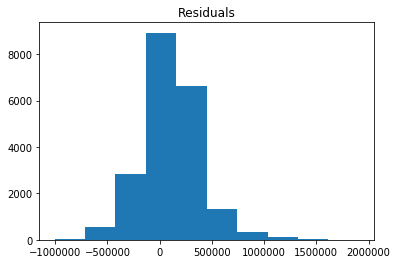

NameError: name 'x' is not defined

In [201]:
plot_residuals(resids)

In [202]:
finaldf = dfnew[x_cols]

In [206]:
finaldf['price']=dfnew['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
finaldf.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,floor_1.5,floor_2.0,floor_3.0,view_1.0,view_2.0,view_3.0,view_4.0,grade_4,grade_12,water_True,base_True,distance_from_airport,price
0,-1.725633,-0.263045,-0.327227,0,0,0,0,0,0,0,0,0,1,0,-1.391529,221900.0
1,0.381165,-0.263045,-0.282862,0,1,0,0,0,0,0,0,0,0,1,0.992174,538000.0
2,-1.725633,-1.715623,0.110589,0,0,0,0,0,0,0,0,0,0,0,1.229509,180000.0
3,1.128563,0.767575,-0.545192,0,0,0,0,0,0,0,0,0,0,1,-1.101136,604000.0
4,0.075164,-0.263045,0.547339,0,0,0,0,0,0,0,0,0,0,0,0.609922,510000.0


In [210]:
X = finaldf.drop(columns='price',axis=1)
y = finaldf['price']

In [211]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [213]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [214]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [215]:
ols.coef_

array([-53332.5132314 ,  36172.48361048, -47234.35240599, 310484.13266737,
       501916.52704855, 434467.40154718, 278928.51987673, 254338.34851773,
       366880.15857828, 566205.4573405 , 174126.64140848, 884070.05869901,
       117738.89663688, 356520.35516341,  62293.37376362])

In [216]:
y_train_preds = ols.predict(X_train)
y_train_preds


array([443858.76562084, 493749.3453514 , 109642.63657952, ...,
        93883.35178784, 478668.88883879,  69928.77523556])

In [217]:
r2_score(y_train, y_train_preds)

-0.13966763739390875

In [218]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [219]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

-0.13966763739390875

In [220]:
testing_score = ols.score(X_test, y_test)
testing_score

-0.13586864337811644

In [221]:
# cv = 5 means 80/20 splits
# cv = 10 means 90/10 splits
# cv = 3 means 67/33 splits

cv_scores = cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

array([-0.15329018, -0.16789171, -0.14617542, -0.07656858, -0.21379668])

In [230]:
rfe = RFE(ols, n_features_to_select=15, step=1, verbose=2)

In [231]:
X_all = finaldf.drop(columns=['price'])
rfe.fit(X_all, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=2)

In [232]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [233]:
new_cols = X_all.columns[rfe.support_]

In [234]:
new_cols

Index(['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5',
       'floor_2.0', 'floor_3.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'grade_4', 'grade_12', 'water_True', 'base_True',
       'distance_from_airport'],
      dtype='object')